<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [43]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

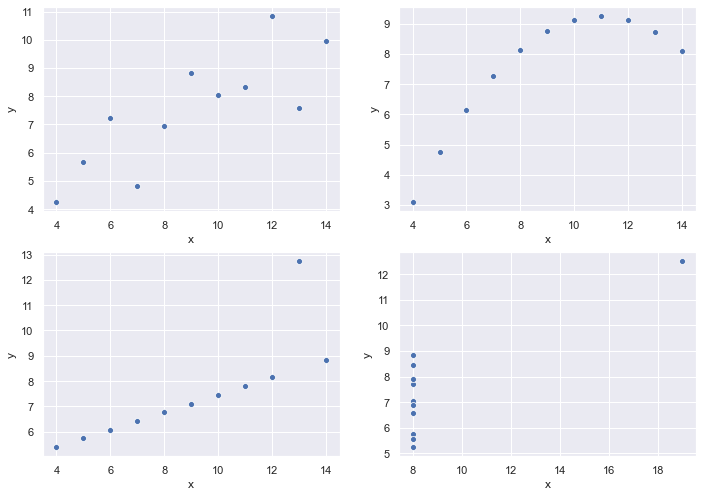

In [44]:
plt.subplot(2,2,1)
sns.scatterplot(x='x', y='y', data=df[df['grupo']=='Grupo_1']) 

plt.subplot(2,2,2)
sns.scatterplot(x='x', y='y', data=df[df['grupo']=='Grupo_2']) 

plt.subplot(2,2,3)
sns.scatterplot(x='x', y='y', data=df[df['grupo']=='Grupo_3']) 

plt.subplot(2,2,4)
sns.scatterplot(x='x', y='y', data=df[df['grupo']=='Grupo_4']) 

plt.show()

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [45]:
df.loc[(df['grupo']=='Grupo_1')].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [46]:
df.loc[(df['grupo']=='Grupo_2')].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [47]:
df.loc[(df['grupo']=='Grupo_3')].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [48]:
df.loc[(df['grupo']=='Grupo_4')].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

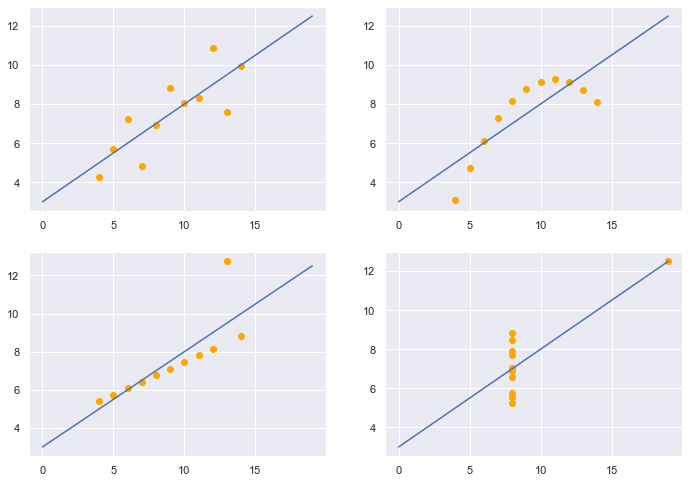

In [49]:
from sklearn.linear_model import LinearRegression

model_rl=LinearRegression()

x1=pd.DataFrame(df.loc[(df['grupo']=='Grupo_1')]['x'])
y1=pd.DataFrame(df.loc[(df['grupo']=='Grupo_1')]['y'])

model_rl.fit(x1, y1)
beta_1 = round(float(model_rl.intercept_),2)
beta_2 = round(float(model_rl.coef_[0]),2)

x2=pd.DataFrame(df.loc[(df['grupo']=='Grupo_2')]['x'])
y2=pd.DataFrame(df.loc[(df['grupo']=='Grupo_2')]['y'])
             
model_rl.fit(x2, y2)
beta_3 = round(float(model_rl.intercept_),2)
beta_4 = round(float(model_rl.coef_[0]),2)

x3=pd.DataFrame(df.loc[(df['grupo']=='Grupo_3')]['x'])
y3=pd.DataFrame(df.loc[(df['grupo']=='Grupo_3')]['y'])
             
model_rl.fit(x3, y3)
beta_5 = round(float(model_rl.intercept_),2)
beta_6 = round(float(model_rl.coef_[0]),2)

x4=pd.DataFrame(df.loc[(df['grupo']=='Grupo_4')]['x'])
y4=pd.DataFrame(df.loc[(df['grupo']=='Grupo_4')]['y'])

model_rl.fit(x4, y4)
beta_7 = round(float(model_rl.intercept_),2)
beta_8 = round(float(model_rl.coef_[0]),2)

x_range = np.arange(0,20,1)

plt.subplot(2,2,1)
plt.scatter(x1, y1, color='orange')
plt.plot(x_range,beta_2*x_range+beta_1)

plt.subplot(2,2,2)
plt.scatter(x2, y2, color='orange')
plt.plot(x_range,beta_4*x_range+beta_3)

plt.subplot(2,2,3)
plt.scatter(x3, y3, color='orange')
plt.plot(x_range,beta_6*x_range+beta_5)

plt.subplot(2,2,4)
plt.scatter(x4, y4, color='orange')
plt.plot(x_range,beta_8*x_range+beta_7)

plt.show()

4. Calcule los resultados de las métricas para cada grupo. Interprete.

Creo que deberian andar estos codigos, pero no puedo comprobarlo, parece que no me deja importar metrics_regression

In [60]:
from metrics_regression import *
from sklearn.metrics import r2_score


df_temp = pd.DataFrame(
    {
        'y': y1['y'],
        'yhat': list(model_rl.predict(x1).reshape(1,-1)[0])
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2']=round(r2_score(y1, model_rl.predict(x1)),4)
df_metrics

ModuleNotFoundError: No module named 'metrics_regression'

In [39]:
df_temp = pd.DataFrame(
    {
        'y':y2['y'],
        'yhat': list(model_rl.predict(x2).reshape(1,-1)[0])
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2']=round(r2_score(y2, model_rl.predict(x2)),4)
df_metrics

NameError: name 'summary_metrics' is not defined

In [40]:
df_temp = pd.DataFrame(
    {
        'y':y3['y'],
        'yhat': list(model_rl.predict(x3).reshape(1,-1)[0])
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2']=round(r2_score(y3, model_rl.predict(x3)),4)
df_metrics

NameError: name 'summary_metrics' is not defined

In [59]:
df_temp = pd.DataFrame(
    {
        'y':y4['y'],
        'yhat': list(model_rl.predict(x4).reshape(1,-1)[0])
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y4, model_rl.predict(x4)),4)
df_metrics

NameError: name 'summary_metrics' is not defined

5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  